# Group Member 3's Working Notebook

Testing the correlation between director and mean_net_profit
This code was worked on by Walter and Aidan 

## Section

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

conn = sqlite3.connect('..\..\data\im.db')

In [2]:

director_AGG = pd.read_sql("""
SELECT pe.primary_name as director, AVG(mob.worldwide_gross - mob.production_budget) as mean_net_profit, COUNT(pe.primary_name) as num_movies
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
GROUP BY pe.primary_name
HAVING num_movies > 5
ORDER BY mean_net_profit DESC
LIMIT 10
;
""", conn)
director_AGG

director  mean_net_profit  num_movies
0          Tim Burton     1.908611e+08           6
1        Ridley Scott     1.769673e+08           7
2    Steven Spielberg     1.647550e+08           8
3          Jon M. Chu     1.502429e+08           6
4      Clint Eastwood     1.379160e+08           6
5  Jaume Collet-Serra     7.547862e+07           6
6    Denis Villeneuve     5.732786e+07           6
7           Tim Story     4.845786e+07           9
8   Steven Soderbergh     4.558173e+07           7
9  David Gordon Green     4.236483e+07           8

<AxesSubplot:xlabel='director'>

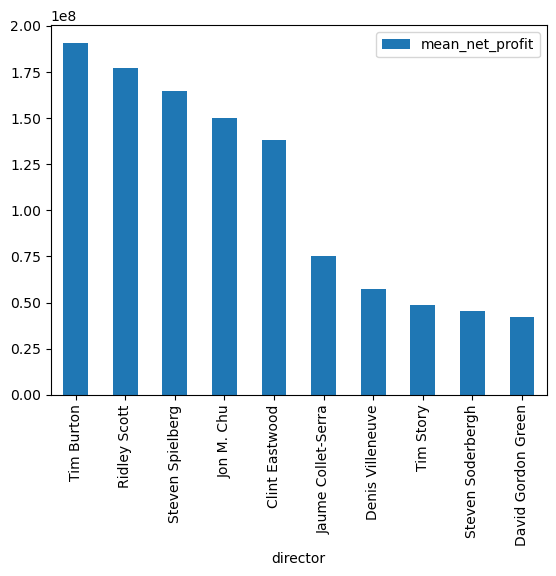

In [3]:
director_AGG.plot.bar(x='director', y='mean_net_profit')

In [5]:
director = pd.read_sql("""
SELECT pe.primary_name as director, (mob.worldwide_gross - mob.production_budget) as net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
;
""", conn)
director

director  net_profit
0          Ethan Coen    42160680
1           Joel Coen    42160680
2           Anbarasan     -700000
3     Dexter Fletcher    22060480
4           Gary Ross   -26762748
...               ...         ...
3864    Joanna Wierig   -13627243
3865        Zefei Liu    45080579
3866  Chase Pottinger    45080579
3867     Yaser Talebi   -30147513
3868       Jay Coster     -191207

[3869 rows x 2 columns]

In [7]:
burton = director[director.director == 'Tim Burton'].net_profit
scott = director[director.director == 'Ridley Scott'].net_profit
spielberg = director[director.director == 'Steven Spielberg'].net_profit
chu = director[director.director == 'Jon M. Chu'].net_profit
eastwood = director[director.director == 'Clint Eastwood'].net_profit
serra = director[director.director == 'Jaume Collet-Serra'].net_profit
villeneuve = director[director.director == 'Denis Villeneuve'].net_profit
story = director[director.director == 'Tim Story'].net_profit
soderbergh = director[director.director == 'Steven Soderbergh'].net_profit
green = director[director.director == 'David Gordon Green'].net_profit


f_oneway(burton, scott, spielberg, chu, eastwood, serra, villeneuve, story, soderbergh, green)


F_onewayResult(statistic=1.2960128916507858, pvalue=0.2585511208253258)

Hypothesis: Tim Burton (Director) makes significantly more net profit than our total population 

Null Hypothesis: Tim Burton (Director) does not make significantly more net profit than our total population. 

The t-value and p-value obtained from a t-test provide information about the statistical significance of the difference between two sample means.

The t-value of 9.928 indicates that there is a large difference between the means of the two groups being compared. 
The t-value suggests that the difference between the means is unlikely to have occurred by chance. 

Therefore, we can reject the null hypothesis and conclude that there is a statistically significant difference between the means of the two groups.
